In [ ]:
import torch

## **Calculate the gradients**

In [ ]:
x = torch.randn(3)
print(x)

tensor([0.1593, 0.9209, 1.0567])


calculate the gradients of some function with respect to x

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-1.4071, -0.9963,  2.0493], requires_grad=True)


In [ ]:
y = x + 2
print(y)

tensor([0.5929, 1.0037, 4.0493], grad_fn=<AddBackward0>)


this will create  the computational graph and this looks like this:

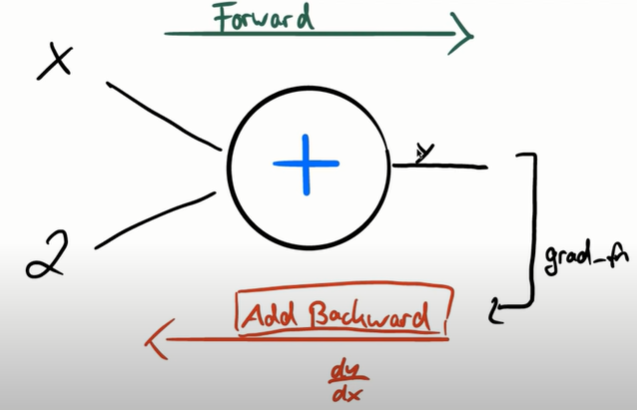

for each operation(+) we have a node with inputs(x,2) and an output(y).

with this graph and back propagation technique, we can calculate the gradients.

first we do a forward pass (calculate y).

y has attribute grad_fn. this will be point to gradient function AddBackward().

since we specified that x requires the gradient, the pytorch will automatically create and store a function for us (AddBackward). this function then be used in the back propagation and to get the gradients. AddBackward will calculate the gradient of y with respect to the x.





In [ ]:
z = y*y*2
print(z)

tensor([ 0.7031,  2.0150, 32.7938], grad_fn=<MulBackward0>)


In [ ]:
z.mean().backward() #dz/dx
print(x.grad)

tensor([0.7906, 1.3383, 5.3991])


in the background this will create a so-called vector jacobian product to get the gradients, this will look like this:

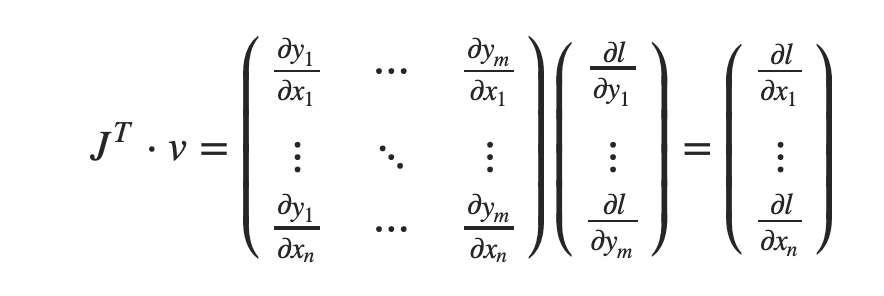

we have the jacobian matrix (J) with the partial derivatives and then we multiply this with a gradient vector (v) and then we will get the final gradients.

in this case z.mean() is a scaler value. so we don't have to use the arg in backward() function.

but if we didn't have apply the mean() to z, z has more than one value in it, now when we try to call the backward function we get error. so grads created only for scaler output.

so we have to create a vector with the same size:

In [ ]:
z = y*y*2
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([1.0277, 5.3533, 5.4153])


## **prevent from tracking the gradients**

we have 3 options:

*   x.requires_grad_(False)
*   x.detach()
*   with torch.no_grad():


 
 

In [ ]:
x.requires_grad_(False)
print(x)

tensor([-1.4071, -0.9963,  2.0493])


In [ ]:
y = x.detach()
print(y)

tensor([-1.4071, -0.9963,  2.0493])


In [ ]:
with torch.no_grad():
  y = x + 2
  print(y)

tensor([0.5929, 1.0037, 4.0493])


## **Empty the gradients**

before do the next operation and optimization step, we must empty the gradients, so:

In [ ]:
x.grads.zero_()